# Analyse exploratoire des données

In [304]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

PROJECT_DIR = Path().cwd().parent.resolve()
DATA_DIR = PROJECT_DIR / "data"
DATA_PATH = DATA_DIR / "03_DONNEES.csv"
OUTPUT_DIR = PROJECT_DIR / "output"
FIGURE_DIR = OUTPUT_DIR / "figures"

In [305]:
# Accessibilité : Daltonisme, Dyslexie, Confort Visuel

sns.set_theme(
    style="whitegrid",
    palette="colorblind",
    context="notebook",
)

plt.rcParams.update(
    {
        "figure.dpi": 120,
        "savefig.dpi": 300,
        "font.family": "Arial",
        "font.size": 12,
        "axes.titlesize": 15,
        "axes.titleweight": "bold",
        "axes.labelsize": 13,
        "axes.labelweight": "medium",
        "axes.edgecolor": "black",
        "axes.linewidth": 1.2,
        "xtick.labelsize": 11,
        "ytick.labelsize": 11,
        "lines.linewidth": 2.2,
        "lines.markersize": 7,
        "legend.fontsize": 11,
        "legend.frameon": True,
        "legend.framealpha": 0.95,
        "grid.linestyle": ":",
        "grid.linewidth": 0.8,
        "grid.alpha": 0.6,
    }
)

COLORBLIND_PALETTE = sns.color_palette("colorblind")

## Chargement et qualité des données

In [306]:
df = pd.read_csv(DATA_PATH.as_posix())
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,InternetCharges,MonthlyCharges,TotalCharges,Churn
0,customer_1,Male,0,No,Yes,51,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,0.00,43.53,2220.03,No
1,customer_2,Male,1,Yes,Yes,14,Yes,Yes,DSL,No internet service,No internet service,Yes,No internet service,Yes,No internet service,Two year,46.00,109.39,1531.46,No
2,customer_3,Female,0,Yes,No,71,No,No,DSL,Yes,No,Yes,Yes,No,Yes,One year,34.36,99.36,7054.56,No
3,customer_4,Male,1,Yes,No,60,Yes,No phone service,Fiber optic,No internet service,No internet service,No,No internet service,Yes,No internet service,Two year,65.56,115.12,6907.20,No
4,customer_5,Male,0,Yes,No,20,No,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,0.00,20.00,400.00,Yes


In [307]:
print(f"Dimensions du DataFrame : {df.shape[0]} lignes et {df.shape[1]} colonnes")

Dimensions du DataFrame : 7043 lignes et 20 colonnes


In [308]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   str    
 1   gender            7043 non-null   str    
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   str    
 4   Dependents        7043 non-null   str    
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   str    
 7   MultipleLines     7043 non-null   str    
 8   InternetService   7043 non-null   str    
 9   OnlineSecurity    7043 non-null   str    
 10  OnlineBackup      7043 non-null   str    
 11  DeviceProtection  7043 non-null   str    
 12  TechSupport       7043 non-null   str    
 13  StreamingTV       7043 non-null   str    
 14  StreamingMovies   7043 non-null   str    
 15  Contract          7043 non-null   str    
 16  InternetCharges   7043 non-null   float64
 17  Monthl

In [309]:
df["SeniorCitizen"].unique()

array([0, 1])

Observation :
- Pas de valeurs nulles.
- Les types sont cohérents avec les données.
- La variable `SeniorCitizen` est de type `int64`, cependant elle sera concidérée comme variable catégorielle dans la suite de l'étude.

Conclusion :
- Les données sont propores.

In [310]:
df["SeniorCitizen"] = df["SeniorCitizen"].apply(lambda x: "Yes" if x == 1 else "No")

## Analyse des features

### Features catégorielles

In [311]:
cat_features = [
    "gender",
    "SeniorCitizen",
    "Partner",
    "Dependents",
    "PhoneService",
    "MultipleLines",
    "InternetService",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies",
    "Contract",
]

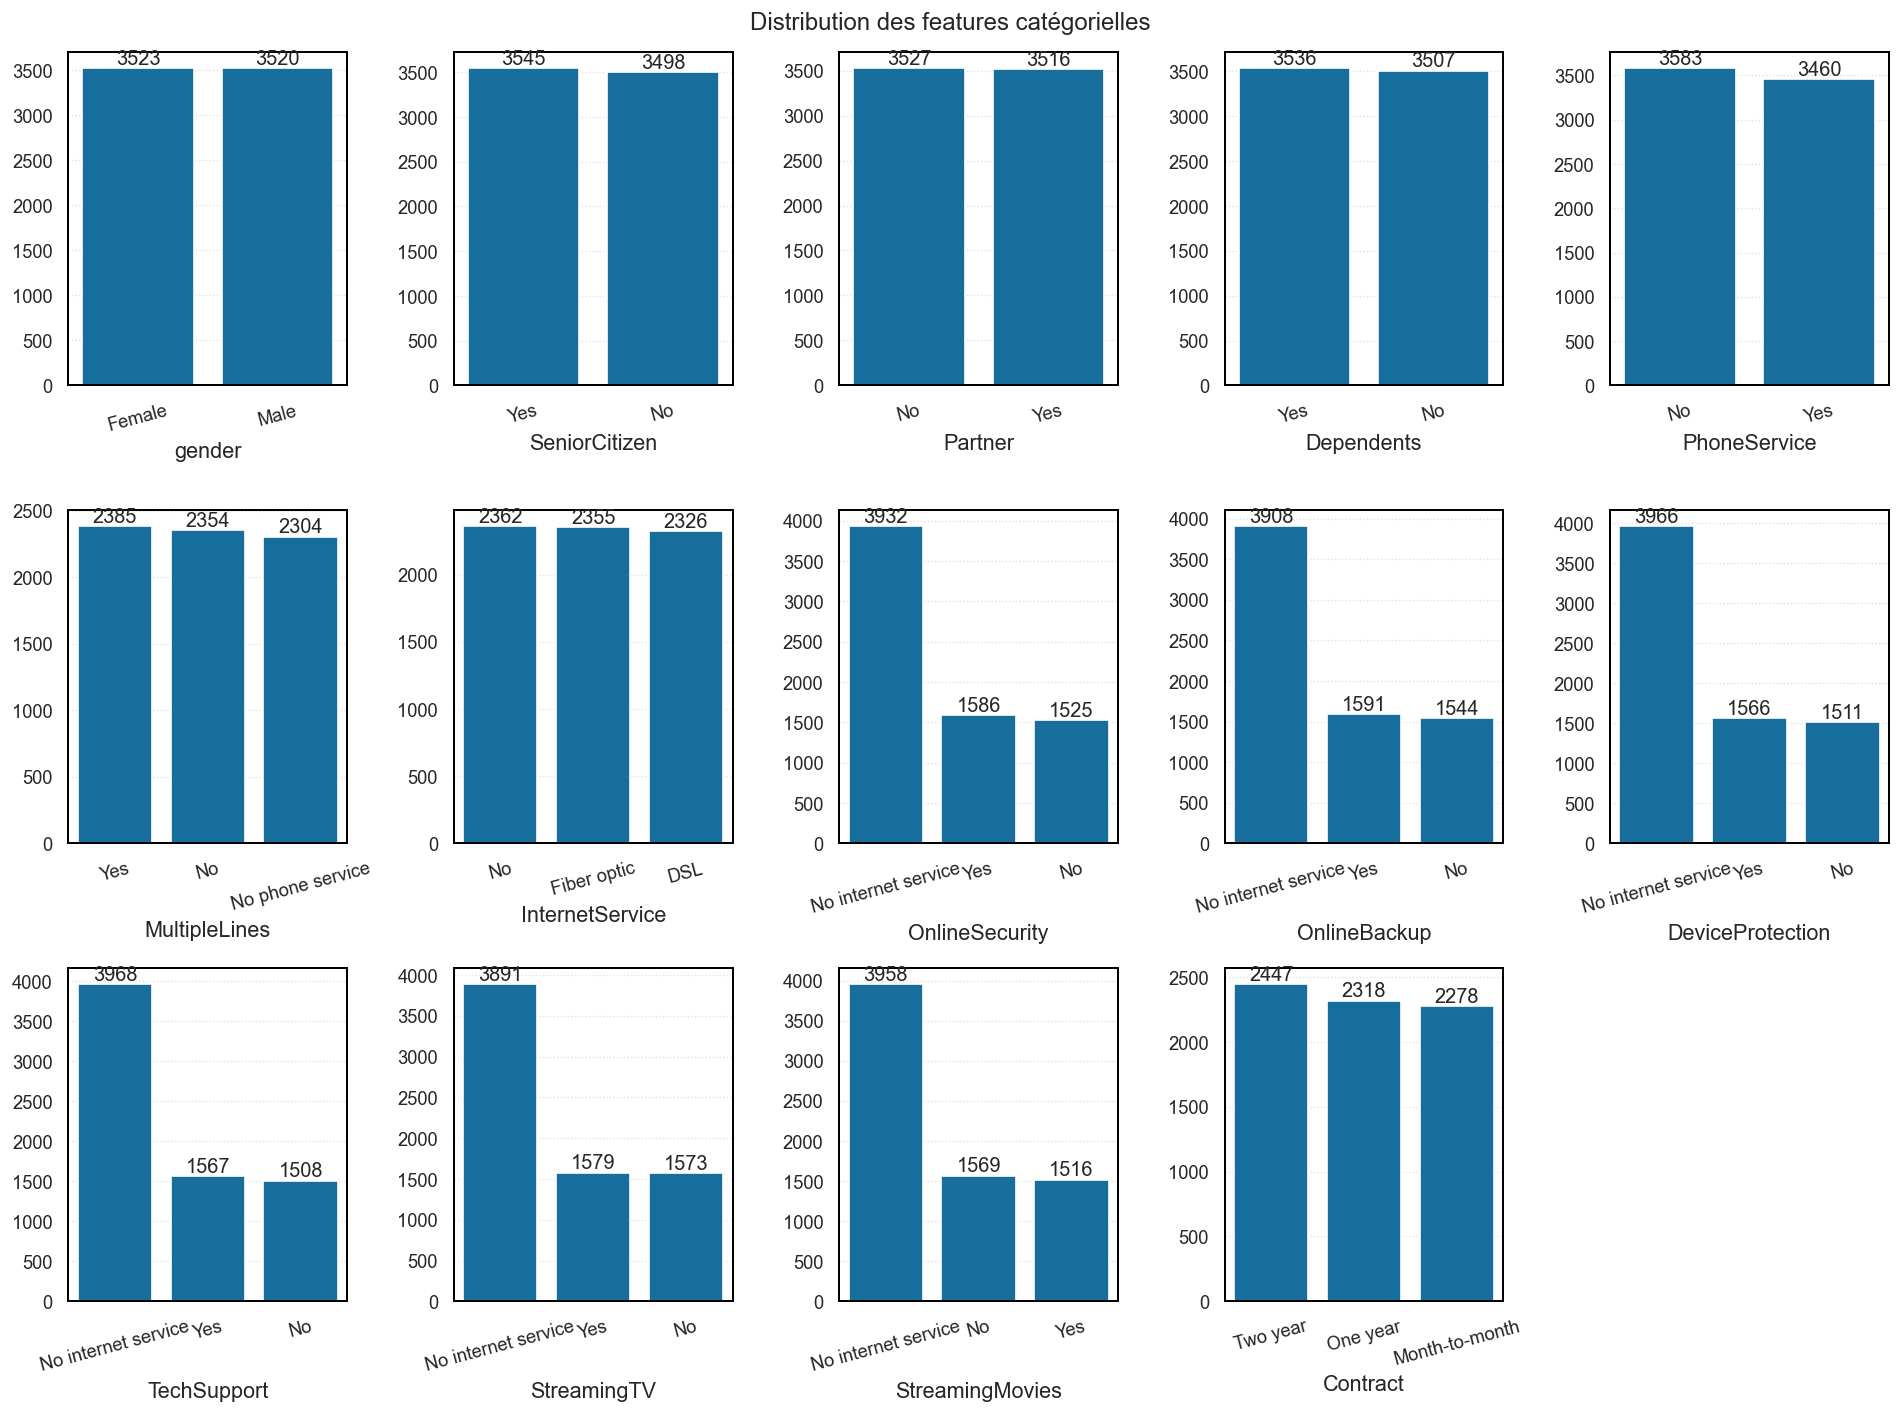

In [312]:
def create_barplot(
    ax: plt.Axes, df: pd.DataFrame, column: str, rotation: int = 0
) -> None:
    value_counts = df[column].value_counts()

    barplot = sns.barplot(
        x=value_counts.index,
        y=value_counts.values,
        ax=ax,
    )

    for container in barplot.containers:
        barplot.bar_label(container)

    if rotation:
        ax.tick_params(axis="x", rotation=rotation)


fig, axes = plt.subplots(3, 5, figsize=(16, 12))

fig.suptitle("Distribution des features catégorielles")

axes = axes.flatten()

for k in range(len(axes)):
    ax = axes[k]
    if k < len(cat_features):
        create_barplot(ax=ax, df=df, column=cat_features[k], rotation=15)
    else:
        ax.set_axis_off()

fig.tight_layout()
plt.savefig((FIGURE_DIR / "01_categorical_features_distribution.png").as_posix())
plt.show()

Observations :
- Les variables `gender`, `SeniorCitizen`, `Partner`, `Dependents`, `PhoneService`, `MultipleLines`, `InternetService`, `OnlineSecurity` et `Contract` ont une répartition proche de l'équirépartition.
- Les variables `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV` et `StreamingMovies` ont pour mode `No internet service`. Pour chaque variable, la modalité `No internet service` a un effectif plus de deux fois supérieur aux autres modalités.

#### Corrélation entre varaibles catégorielles

In [313]:
def compute_cramers_v(x: pd.Series, y: pd.Series) -> float:
    contingency_table = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum()
    r, k = contingency_table.shape
    return np.sqrt(chi2 / (n * (min(k - 1, r - 1))))


def compute_cat_corr_df(df: pd.DataFrame, cat_vars: list) -> pd.DataFrame:
    cat_corr_mat = np.zeros((len(cat_vars), len(cat_vars)))
    for i in range(len(cat_vars)):
        for j in range(len(cat_vars)):
            cat_corr_mat[i, j] = compute_cramers_v(df[cat_vars[i]], df[cat_vars[j]])
    return pd.DataFrame(cat_corr_mat)


cat_corr_df = compute_cat_corr_df(df=df, cat_vars=cat_features)

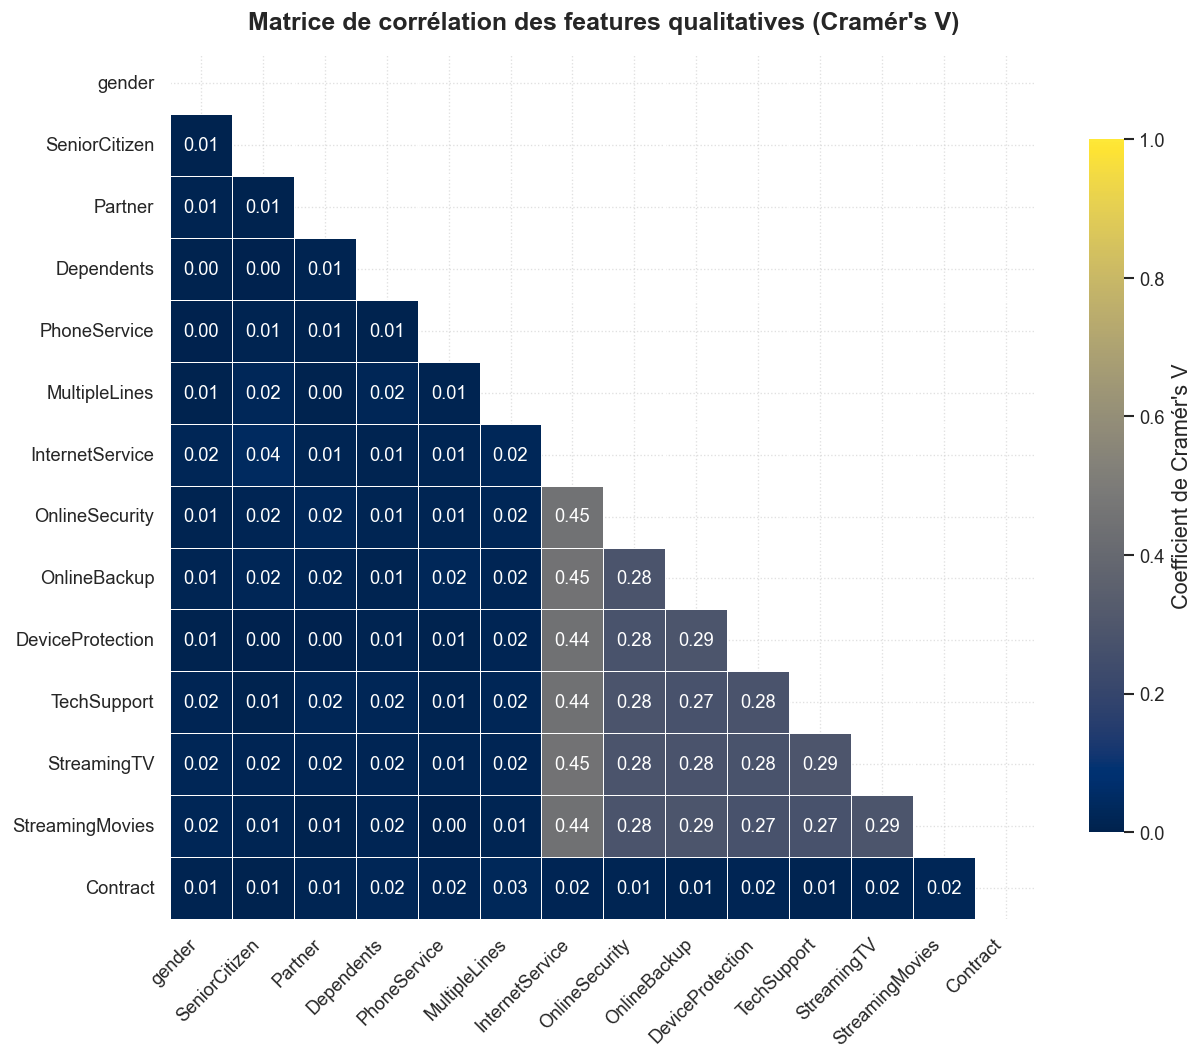

In [314]:
fig, ax = plt.subplots(figsize=(12, 9))

heatmap = sns.heatmap(
    cat_corr_df,
    mask=np.triu(np.ones_like(cat_corr_df, dtype=bool)),
    annot=True,
    fmt=".2f",
    cmap="cividis",
    vmin=0,
    vmax=1,
    square=True,
    linewidths=0.6,
    linecolor="white",
    cbar_kws={"shrink": 0.8, "pad": 0.04, "label": "Coefficient de Cramér's V"},
    annot_kws={"size": 11},
    ax=ax,
)
ax.set_title("Matrice de corrélation des features qualitatives (Cramér's V)", pad=14)
ax.set_xticklabels(cat_features, rotation=45, ha="right")
ax.set_yticklabels(cat_features, rotation=0)

plt.tight_layout()
plt.savefig((FIGURE_DIR / "01_correlation_matrix_cat.png").as_posix())
plt.show()

Obserations :
- Corrélation modérée $\simeq 0.45$ entre `InternetService` et l'ensemble des varaibles suivantes `StreamingMovies`, `StreamingTV`, `TechSupport`, `DeviceProtection`, `OnlineBackup` et `OnlineSecurity`.
- Corrélation faible $\simeq 0.28$ entre l'ensemble des varaibles suivantes prisent deux à deux `StreamingMovies`, `StreamingTV`, `TechSupport`, `DeviceProtection`, `OnlineBackup` et `OnlineSecurity`.
- Le reste des features catégorielles ne montrent pas de corrélation.

Interprétations (à confirmer avec l'équipe métier) :
- `StreamingMovies`, `StreamingTV`, `TechSupport`, `DeviceProtection`, `OnlineBackup` et `OnlineSecurity` sont des services internet, d'où leur corrélation avec `InternetService`.
- Les corrélations entre les services internet sont peut-être dûes aux offres.

### Features numériques

In [315]:
num_features = ["tenure", "InternetCharges", "MonthlyCharges", "TotalCharges"]

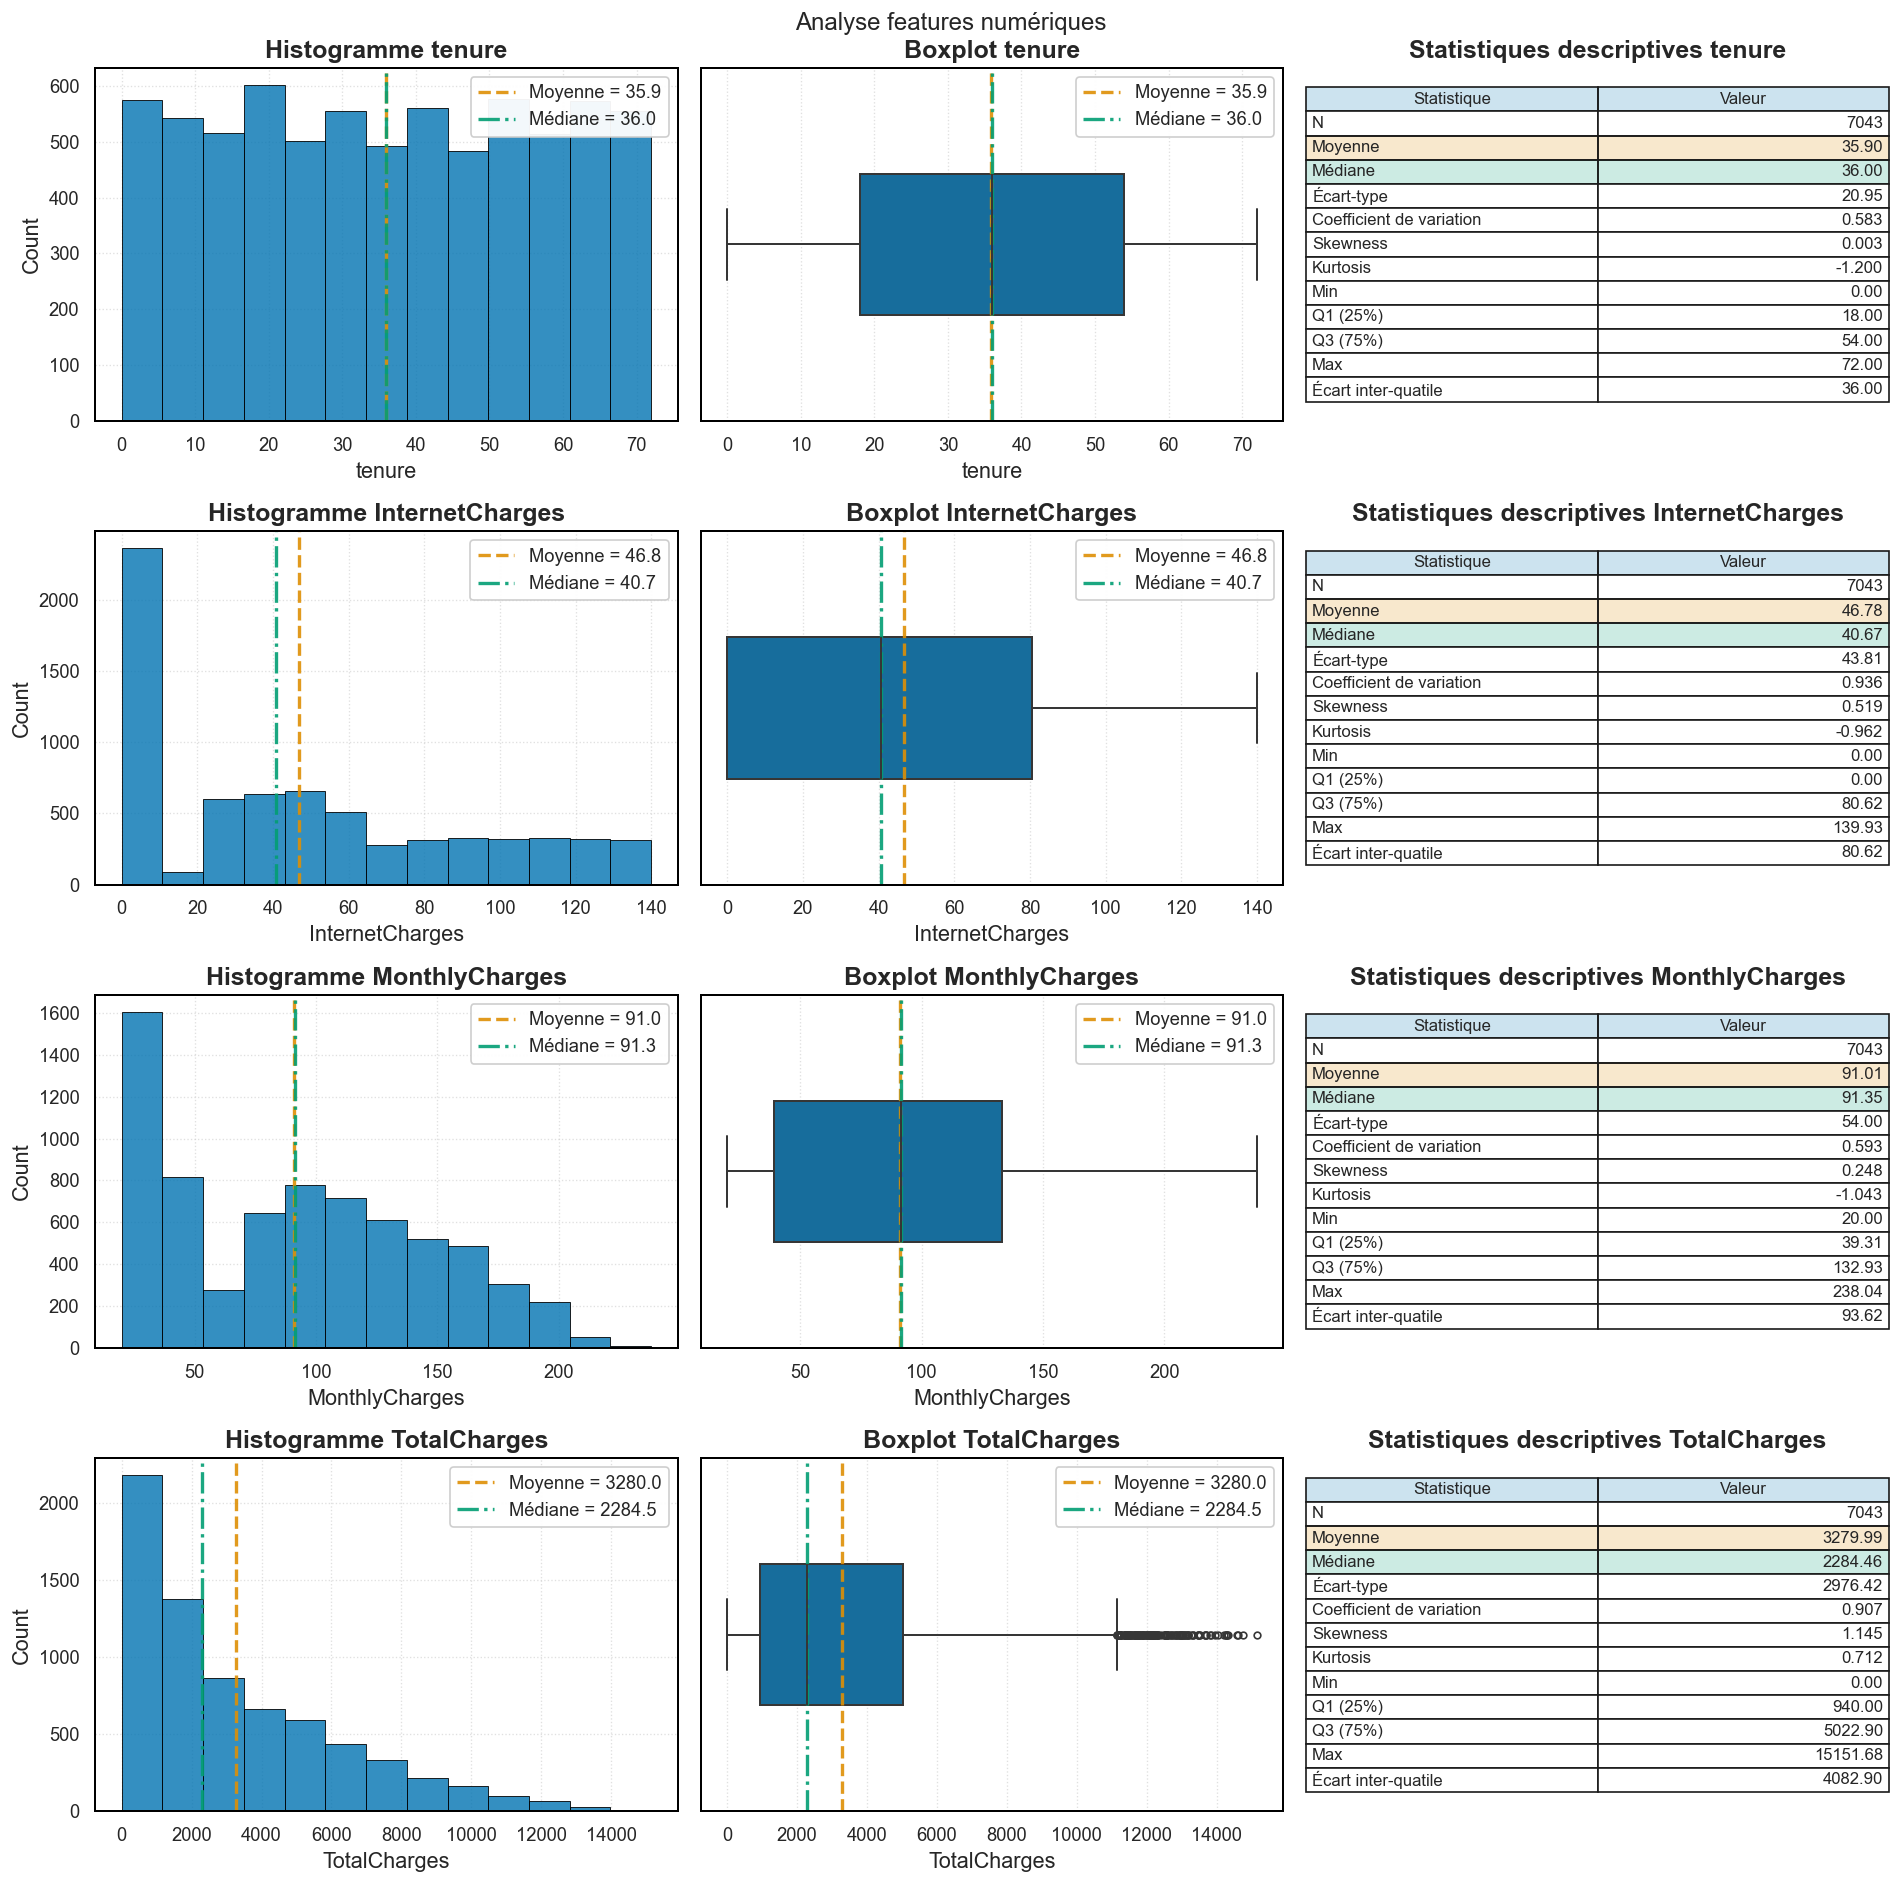

In [316]:
def create_histplot(ax, df, column):
    values = df[column].dropna()

    sns.histplot(
        x=values,
        # bins=int(np.sqrt(len(values))),
        bins=int(1 + np.log2(len(values))),
        color=COLORBLIND_PALETTE[0],
        edgecolor="black",
        linewidth=0.5,
        alpha=0.8,
        ax=ax,
    )

    mean_column = values.mean()
    median_column = values.median()

    ax.axvline(
        mean_column,
        color=COLORBLIND_PALETTE[1],
        linestyle="--",
        linewidth=2,
        alpha=0.9,
        label=f"Moyenne = {mean_column:.1f}",
    )

    ax.axvline(
        median_column,
        color=COLORBLIND_PALETTE[2],
        linestyle="-.",
        linewidth=2,
        alpha=0.9,
        label=f"Médiane = {median_column:.1f}",
    )

    ax.set_title(f"Histogramme {column}")
    ax.legend(frameon=True)


def create_boxplot(ax, df, column):
    values = df[column].dropna()

    sns.boxplot(
        x=values,
        ax=ax,
        color=COLORBLIND_PALETTE[0],
        width=0.4,
        fliersize=4,
        linewidth=1.2,
    )

    mean_val = values.mean()
    median_val = values.median()

    ax.axvline(
        mean_val,
        color=COLORBLIND_PALETTE[1],
        linestyle="--",
        linewidth=2,
        alpha=0.9,
        label=f"Moyenne = {mean_val:.1f}",
    )

    ax.axvline(
        median_val,
        color=COLORBLIND_PALETTE[2],
        linestyle="-.",
        linewidth=2,
        alpha=0.9,
        label=f"Médiane = {median_val:.1f}",
    )

    ax.set_title(f"Boxplot {column}")
    ax.legend(frameon=True)


def create_stats_panel(ax, df, column):
    values = df[column].dropna()

    mean_val = values.mean()
    std_val = values.std()
    cv = std_val / mean_val if mean_val != 0 else np.nan
    skew = values.skew()
    kurt = values.kurtosis()
    q1 = values.quantile(0.25)
    q3 = values.quantile(0.75)

    stats_data = [
        ["N", f"{len(values)}"],
        ["Moyenne", f"{mean_val:.2f}"],
        ["Médiane", f"{values.median():.2f}"],
        ["Écart-type", f"{std_val:.2f}"],
        ["Coefficient de variation", f"{cv:.3f}"],
        ["Skewness", f"{skew:.3f}"],
        ["Kurtosis", f"{kurt:.3f}"],
        ["Min", f"{values.min():.2f}"],
        ["Q1 (25%)", f"{q1:.2f}"],
        ["Q3 (75%)", f"{q3:.2f}"],
        ["Max", f"{values.max():.2f}"],
        ["Écart inter-quatile", f"{q3 - q1:.2f}"],
    ]

    table = ax.table(
        cellText=stats_data,
        colLabels=["Statistique", "Valeur"],
        cellLoc="right",
        colLoc="center",
        loc="center",
    )

    ax.set_title(f"Statistiques descriptives {column}")

    # Style
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 1.1)

    for (row, col), cell in table.get_celld().items():
        if row == 0:
            cell.set_facecolor(COLORBLIND_PALETTE[0] + (0.2,))
        else:
            cell.PAD = 0.02
            if col == 0:
                cell.get_text().set_ha("left")
        if row == 2:
            cell.set_facecolor(COLORBLIND_PALETTE[1] + (0.2,))
        if row == 3:
            cell.set_facecolor(COLORBLIND_PALETTE[2] + (0.2,))

    ax.set_axis_off()


fig, axes = plt.subplots(len(num_features), 3, figsize=(16, 16))

fig.suptitle("Analyse features numériques")

for k in range(len(num_features)):
    column = num_features[k]
    create_histplot(ax=axes[k, 0], df=df, column=column)
    create_boxplot(ax=axes[k, 1], df=df, column=column)
    create_stats_panel(ax=axes[k, 2], df=df, column=column)

fig.tight_layout()
plt.savefig((FIGURE_DIR / "01_numeric_features_analyses.png").as_posix())
plt.show()

Observations :
- `tenure` :
  - Distribution proche d'une loi uniforme.
  - Pas d'outlier détecté avec la méthode de Turkey, $Q1 - 1.5 \times IQR = -36 < 0$ et $Q3 + 1.5 \times IQR = 108 > 72$.
- `InternetCharges` :
  - Forte propostion de 0 dans la distribution.
  - Moyenne et médiane ne sont pas alignées. Quelques valeurs élevèes tirent peut-être la moyenne vers le haut.
  - Pas d'outlier détecté avec la méthode de Turkey.
- `InternetCharges` :
  - La distribution semble bi-modale.
  - Pas d'outlier détecté avec la méthode de Turkey.
- `TotalCharges` :
  - La distribution est fortement asymétrique avec une queue série à gauche lourde. Une transformation logarithmique ou puissance pourrait aider à normaliser la distribution.
  - Outliers détectés avec la méthode de Turkey dans les valeurs maximales.

#### Transformation de la varaible `TotalCharges`

In [317]:
TotalCharges = df["TotalCharges"]

transformed, lambda_opt = stats.boxcox(TotalCharges + 1)

print("Lambda optimal:", lambda_opt)

Lambda optimal: 0.3295396104109565


Pour simplifier, on choisira un $\lambda = 0.33$

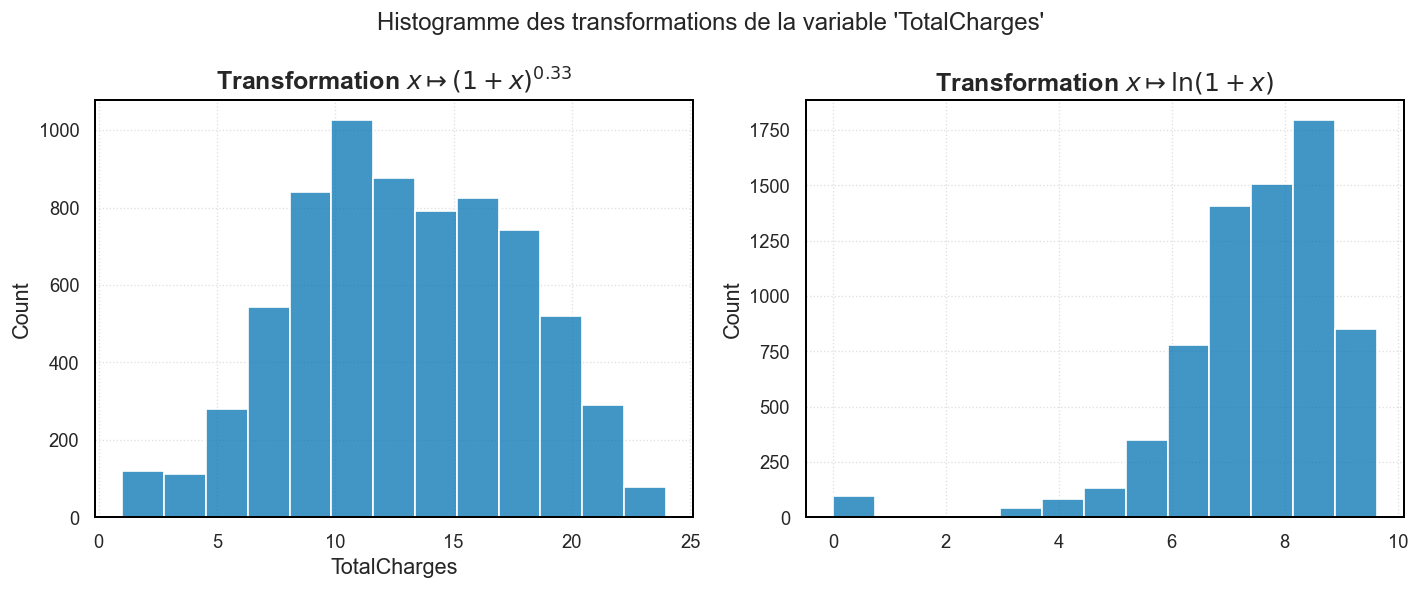

In [318]:
TotalCharges_boxcox = TotalCharges.apply(lambda x: np.pow(1 + x, 0.33))
TotalCharges_log = TotalCharges.apply(lambda x: np.log(1 + x))

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

fig.suptitle("Histogramme des transformations de la variable 'TotalCharges'")

ax1 = axes[0]
sns.histplot(
    x=TotalCharges_boxcox.values,
    bins=int(1 + np.log2(len(TotalCharges_boxcox))),
    ax=ax1,
)
ax1.set_title(r"Transformation $x\mapsto (1+x)^{0.33}$")
ax1.set_xlabel("TotalCharges")

ax2 = axes[1]
sns.histplot(
    x=TotalCharges_log.values,
    bins=int(1 + np.log2(len(TotalCharges_log))),
    ax=ax2,
)
ax2.set_title(r"Transformation $x\mapsto \ln(1+x)$")
ax1.set_xlabel("TotalCharges")

plt.tight_layout()
plt.savefig((FIGURE_DIR / "01_transformation_TotalCharges.png").as_posix())
plt.show()

La transformation $x\mapsto (1+x)^{0.33}$ propose une distribution plus symétrique.

In [319]:
# Test de Shapiro-Wilk
statistic, p_value = stats.shapiro(TotalCharges_boxcox.sample(3000))

print(f"Statistique W : {statistic}")
print(f"p-value       : {p_value}")

# Interprétation
alpha = 0.05
if p_value > alpha:
    print("On ne rejette pas H0 : la distribution est compatible avec une loi normale.")
else:
    print("On rejette H0 : la distribution n'est pas normale.")

Statistique W : 0.9908916460010238
p-value       : 6.710177592823551e-13
On rejette H0 : la distribution n'est pas normale.


L'hyptothèse de normale n'est pas rejetée, après transformation $x\mapsto (1+x)^{0.33}$, la varaible `TotalCharges` n'est pas normale.

#### Corrélation varaibles numériques

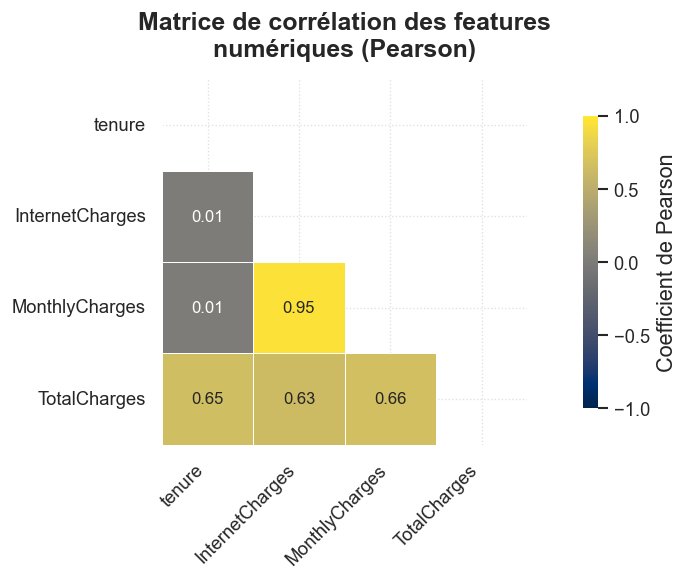

In [320]:
num_corr_df = df[num_features].corr(method="pearson")

fig, axes = plt.subplots(1, 1, figsize=(12, 5))

heatmap = sns.heatmap(
    num_corr_df,
    mask=np.triu(np.ones_like(num_corr_df, dtype=bool)),
    annot=True,
    fmt=".2f",
    cmap="cividis",
    vmin=-1,
    vmax=1,
    square=True,
    linewidths=0.6,
    linecolor="white",
    cbar_kws={"shrink": 0.8, "pad": 0.04, "label": "Coefficient de Pearson"},
    annot_kws={"size": 10},
    ax=axes,
)
axes.set_title("Matrice de corrélation des features\nnumériques (Pearson)", pad=14)
axes.set_xticklabels(num_features, rotation=45, ha="right")
axes.set_yticklabels(num_features, rotation=0)

plt.tight_layout()
plt.savefig((FIGURE_DIR / "01_correlation_matrix_num.png").as_posix())
plt.show()

Observations :
- Forte corrélation entre `MonthlyCharges` et `InternetCharges` $\simeq 0.95$.
- Corrélation modérée entre `TotalCharges` et l'ensemble des variables suivantes `tenure`, `InternetCharges` et `MonthlyCharges`.
- Absence de corrélation entre `tenure` et l'ensemble des variables suivantes `MonthlyCharges` et `InternetCharges`.

Interprétation (à confirmer avec l'équipe métier) :
- La variable `MonthlyCharges` doit être calculée à partir de la variable `InternetCharges`.
- Les variables `tenure` et `MonthlyCharges` doivent intervenir dans le calcule de la variable `TotalCharges`.

### Corrélation features catégorielles et numériques

In [321]:
def calculate_eta2(categories: pd.Series, values: pd.Series) -> float:
    means = values.groupby(categories).mean()
    n = values.groupby(categories).count()
    total_mean = values.mean()

    inter_categorical_variance = 1 / n.sum() * (n * (means - total_mean) ** 2).sum()
    total_variance = 1 / n.sum() * ((values - total_mean) ** 2).sum()
    return inter_categorical_variance / total_variance


def compute_cat_num_corr_df(
    df: pd.DataFrame, cat_vars: list, num_vars: list
) -> pd.DataFrame:
    eta2_dict = {}
    for cat_var in cat_vars:
        eta2_dict[cat_var] = {}
        for num_var in num_vars:
            eta2_dict[cat_var][num_var] = calculate_eta2(df[cat_var], df[num_var])
    eta2_df = pd.DataFrame(eta2_dict).T[num_vars]
    return eta2_df


cat_num_corr_df = compute_cat_num_corr_df(df, cat_features, num_features)

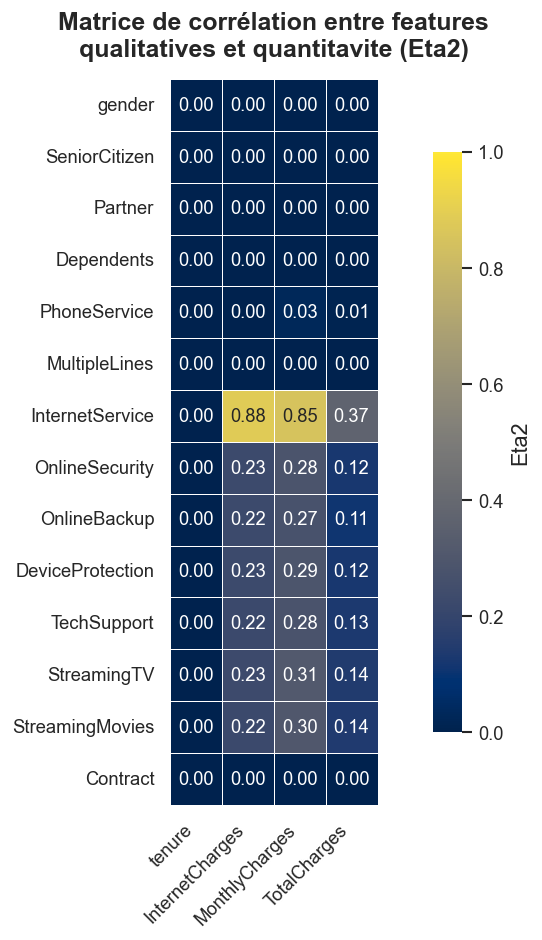

In [322]:
fig, ax = plt.subplots(figsize=(12, 8))

heatmap = sns.heatmap(
    cat_num_corr_df,
    annot=True,
    fmt=".2f",
    cmap="cividis",
    vmin=0,
    vmax=1,
    square=True,
    linewidths=0.6,
    linecolor="white",
    cbar_kws={"shrink": 0.8, "pad": 0.04, "label": "Eta2"},
    annot_kws={"size": 11},
    ax=ax,
)
ax.set_title(
    "Matrice de corrélation entre features\nqualitatives et quantitavite (Eta2)",
    pad=14,
)
ax.set_xticklabels(num_features, rotation=45, ha="right")
ax.set_yticklabels(cat_features, rotation=0)

plt.tight_layout()
plt.savefig((FIGURE_DIR / "01_correlation_matrix_cat_num.png"))
plt.show()

Observations :
- La variable catégorielle `InternetService` semble fortement corrélée aux variables numériques `InternetCharges` et `MonthlyCharges`.
- La variable catégorielle `InternetService` semble faiblement corrélée à la variable numériques `TotalCharges`.
- Les variables numériques `InternetCharges`, `MonthlyCharges` et `TotalChaarges` semblent faiblement corrélées aux variables catégorielles `OnlineSecurity`, `OnelineBackup`, `DeviceProtection`, `TechSupport`,`StreamingTV` et `StreamingMovies`.

## Analyse de la target `Chrun`

### Distribution de la variable `Churn`

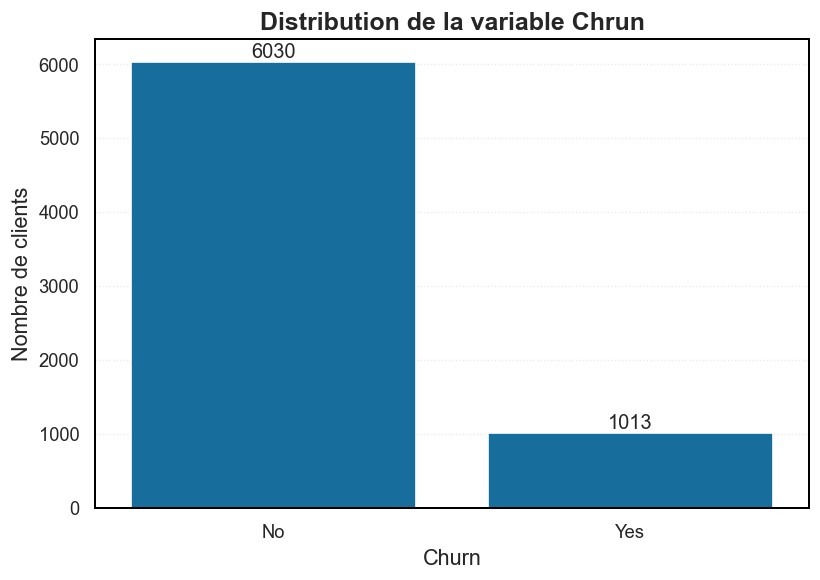

In [323]:
fig, axes = plt.subplots(1, 1, figsize=(7, 5))

churn = df["Churn"].value_counts()

barplot = sns.barplot(
    x=churn.index,
    y=churn.values,
    ax=axes,
)

for container in barplot.containers:
    barplot.bar_label(container)

axes.grid(axis="y", linestyle=":", alpha=0.4)
axes.set_title("Distribution de la variable Chrun")
axes.set_xlabel("Churn")
axes.set_ylabel("Nombre de clients")

plt.tight_layout()
plt.savefig((FIGURE_DIR / "01_churn_distribution.png").as_posix())
plt.show()

In [324]:
print(
    f"Proportion de 'No' dans la variable Chrun : {churn.loc['No'] / churn.sum() * 100:.2f}%"
)
print(
    f"Proportion de 'Yes' dans la variable Chrun : {churn.loc['Yes'] / churn.sum() * 100:.2f}%"
)

Proportion de 'No' dans la variable Chrun : 85.62%
Proportion de 'Yes' dans la variable Chrun : 14.38%


Observation :
- La distribution de la variable `Churn` est très déséquilibrée, environ 86% de No et 14% de Yes.

Conclusion :
- Lors du split train/test, la statification est primordiale.
- On portera une attention particulière à la métrique recall pour minimiser le nombre de faux négatifs coûteux pour l'entreprise.
- on préférera un modèle avec pondération des classes.

### Corrélations entre la target et les features

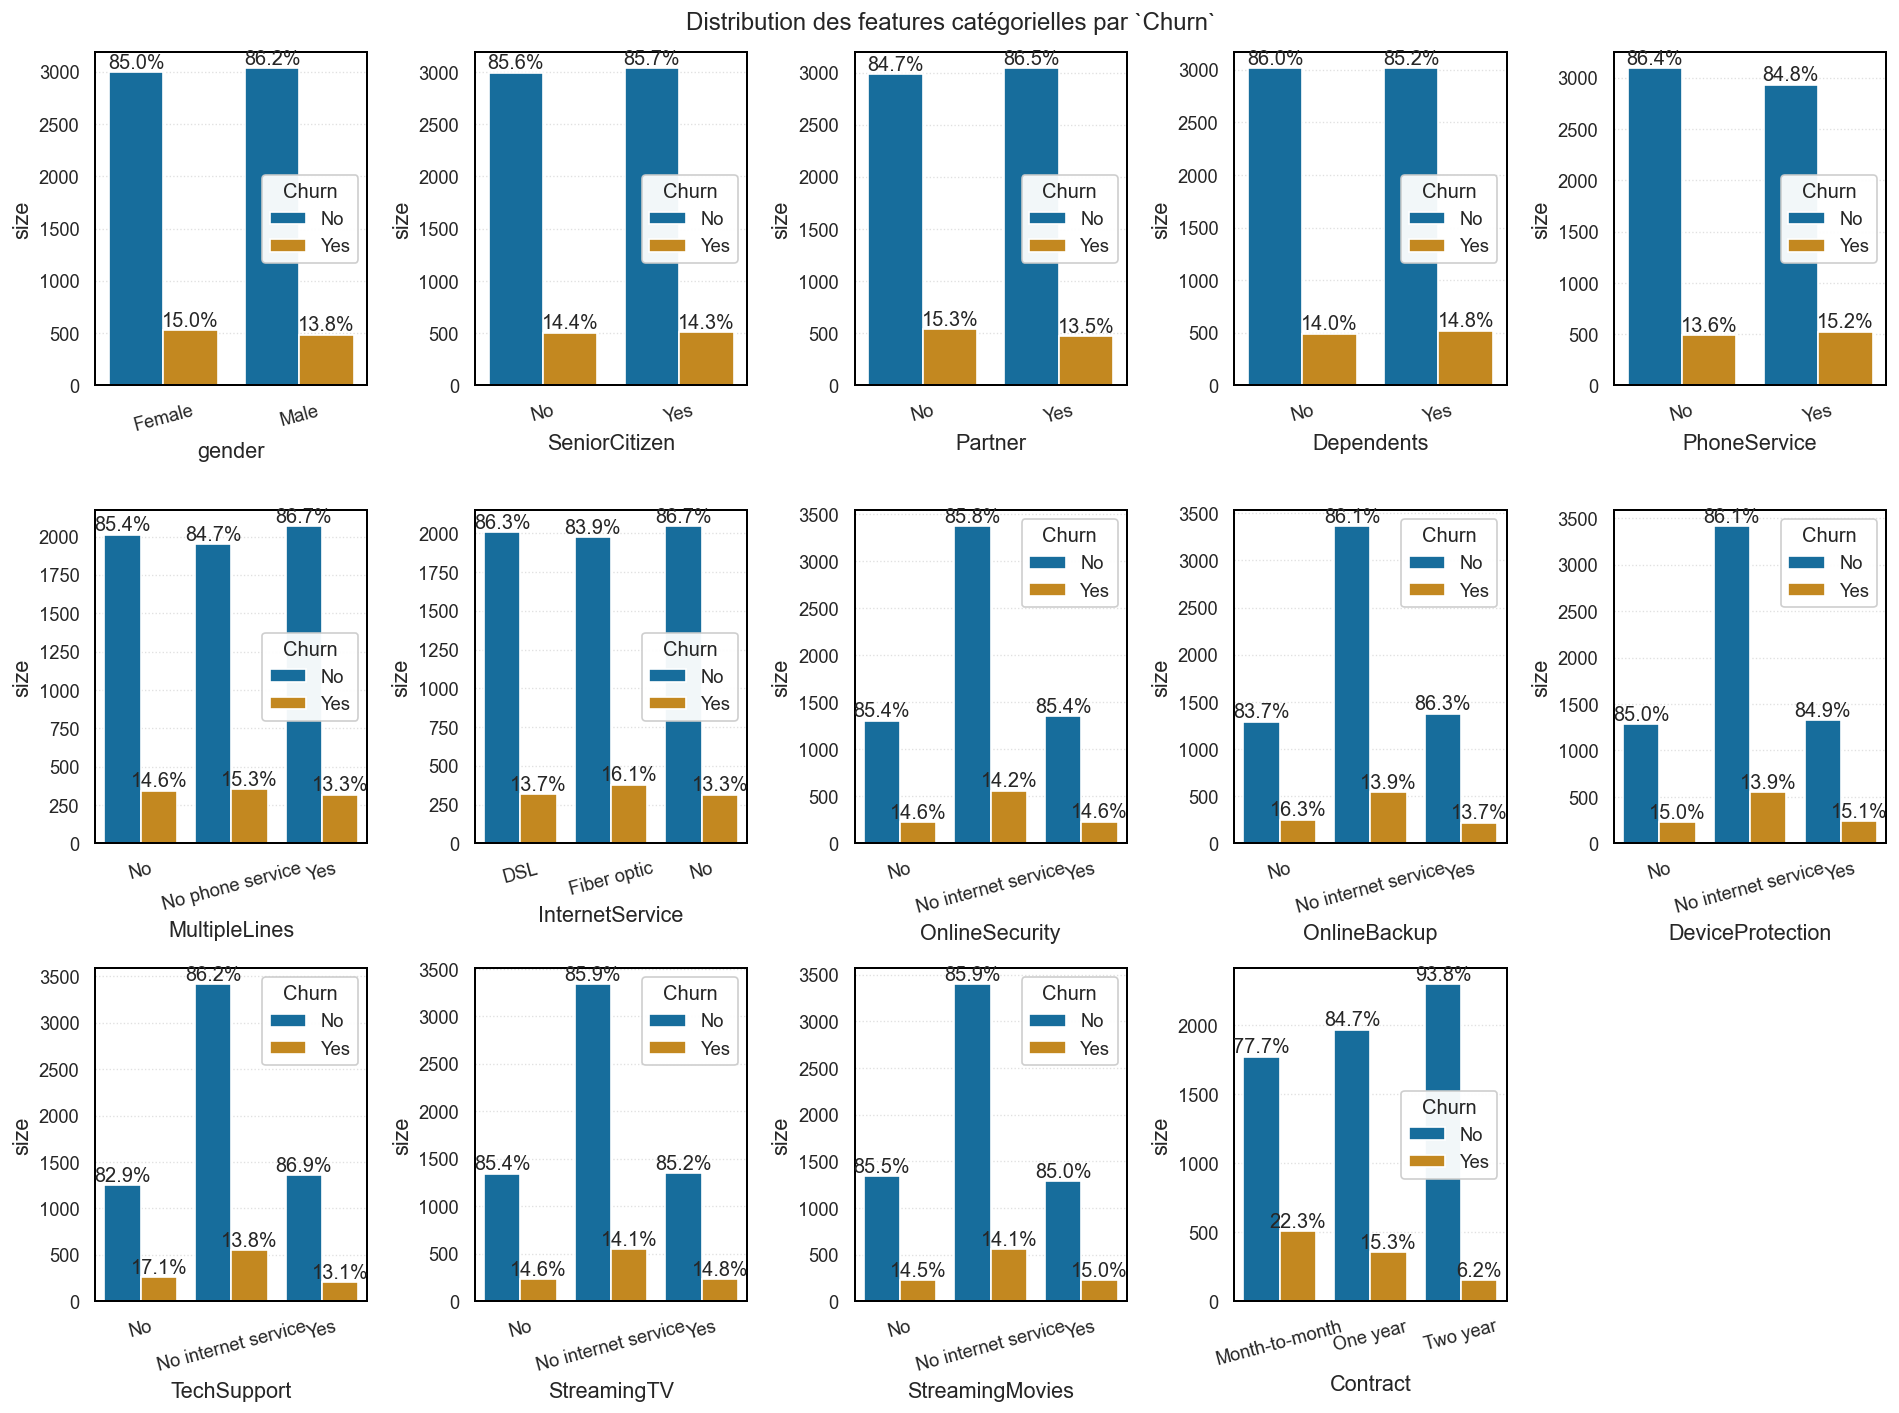

In [325]:
target = "Churn"


def create_barplot_target(
    ax: plt.Axes, df: pd.DataFrame, target: str, column: str, rotation: int = 0
) -> None:
    df_grpby = df.groupby([target, column]).size().reset_index(name="size")

    totals = df.groupby(column).size().reset_index(name="total")

    df_grpby = df_grpby.merge(totals, on=column)
    df_grpby["proportion"] = df_grpby["size"] / df_grpby["total"]

    barplot = sns.barplot(
        data=df_grpby,
        x=column,
        y="size",
        hue=target,
        ax=ax,
    )

    k = 0
    for container in barplot.containers:
        labels = []
        for bar in container:
            labels.append(f"{df_grpby.loc[k, 'proportion'] * 100:.1f}%")
            k += 1
        barplot.bar_label(container, labels=labels)

    if rotation:
        ax.tick_params(axis="x", rotation=rotation)


fig, axes = plt.subplots(3, 5, figsize=(16, 12))

fig.suptitle("Distribution des features catégorielles par `Churn`")

axes = axes.flatten()

for k in range(len(axes)):
    ax = axes[k]
    if k < len(cat_features):
        create_barplot_target(
            ax=ax, df=df, target=target, column=cat_features[k], rotation=15
        )
    else:
        ax.set_axis_off()

fig.tight_layout()
plt.savefig((FIGURE_DIR / "01_target_analysis_categorical_features.png").as_posix())
plt.show()

Observations :
- Les proportions de `Churn` par modalité suivent les proportions du dataset pour presque toutes les variables catégorielles à l'exeption de la varaible `Contrat`.
- Pour la variable `Contrat`, la répartition de `Churn` de la modalité `Month-to-month` indique que les clients ayant choisis ce contrat sont plus suceptibles de partir. La répartition de `Churn` de la modalité `Two year` indique que les clients ayant choisis ce contrat sont moins suceptibles de partir.

Conclusion :
- Observer l'influance de la variable `Contrat` sur les modèles.

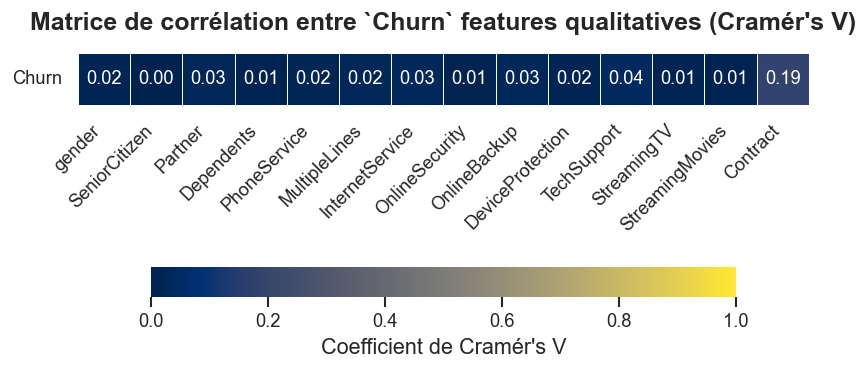

In [326]:
cat_vars = cat_features + [target]

corr_mat_cat_target = compute_cat_corr_df(df=df, cat_vars=cat_vars)
corr_with_target = corr_mat_cat_target.loc[
    len(corr_mat_cat_target) - 1, : len(corr_mat_cat_target) - 2
]
corr_with_target_df = pd.DataFrame(corr_with_target).T

fig, ax = plt.subplots(figsize=(7, 4))

heatmap = sns.heatmap(
    corr_with_target_df,
    annot=True,
    fmt=".2f",
    cmap="cividis",
    vmin=0,
    vmax=1,
    square=True,
    linewidths=0.6,
    linecolor="white",
    cbar_kws={
        "shrink": 0.8,
        "pad": 0.4,
        "label": "Coefficient de Cramér's V",
        "orientation": "horizontal",
    },
    annot_kws={"size": 11},
    ax=ax,
)
ax.set_title(
    "Matrice de corrélation entre `Churn` features qualitatives (Cramér's V)", pad=14
)
ax.set_xticklabels(cat_features, rotation=45, ha="right")
ax.set_yticklabels([target], rotation=0)

plt.tight_layout()
plt.savefig((FIGURE_DIR / "01_correlation_matrix_target_cat.png").as_posix())
plt.show()

Observations :
- Corrèlation faible entre `Churn` et `Contrat`.
- Pas de corrélation avec les autres variables catégorielles.

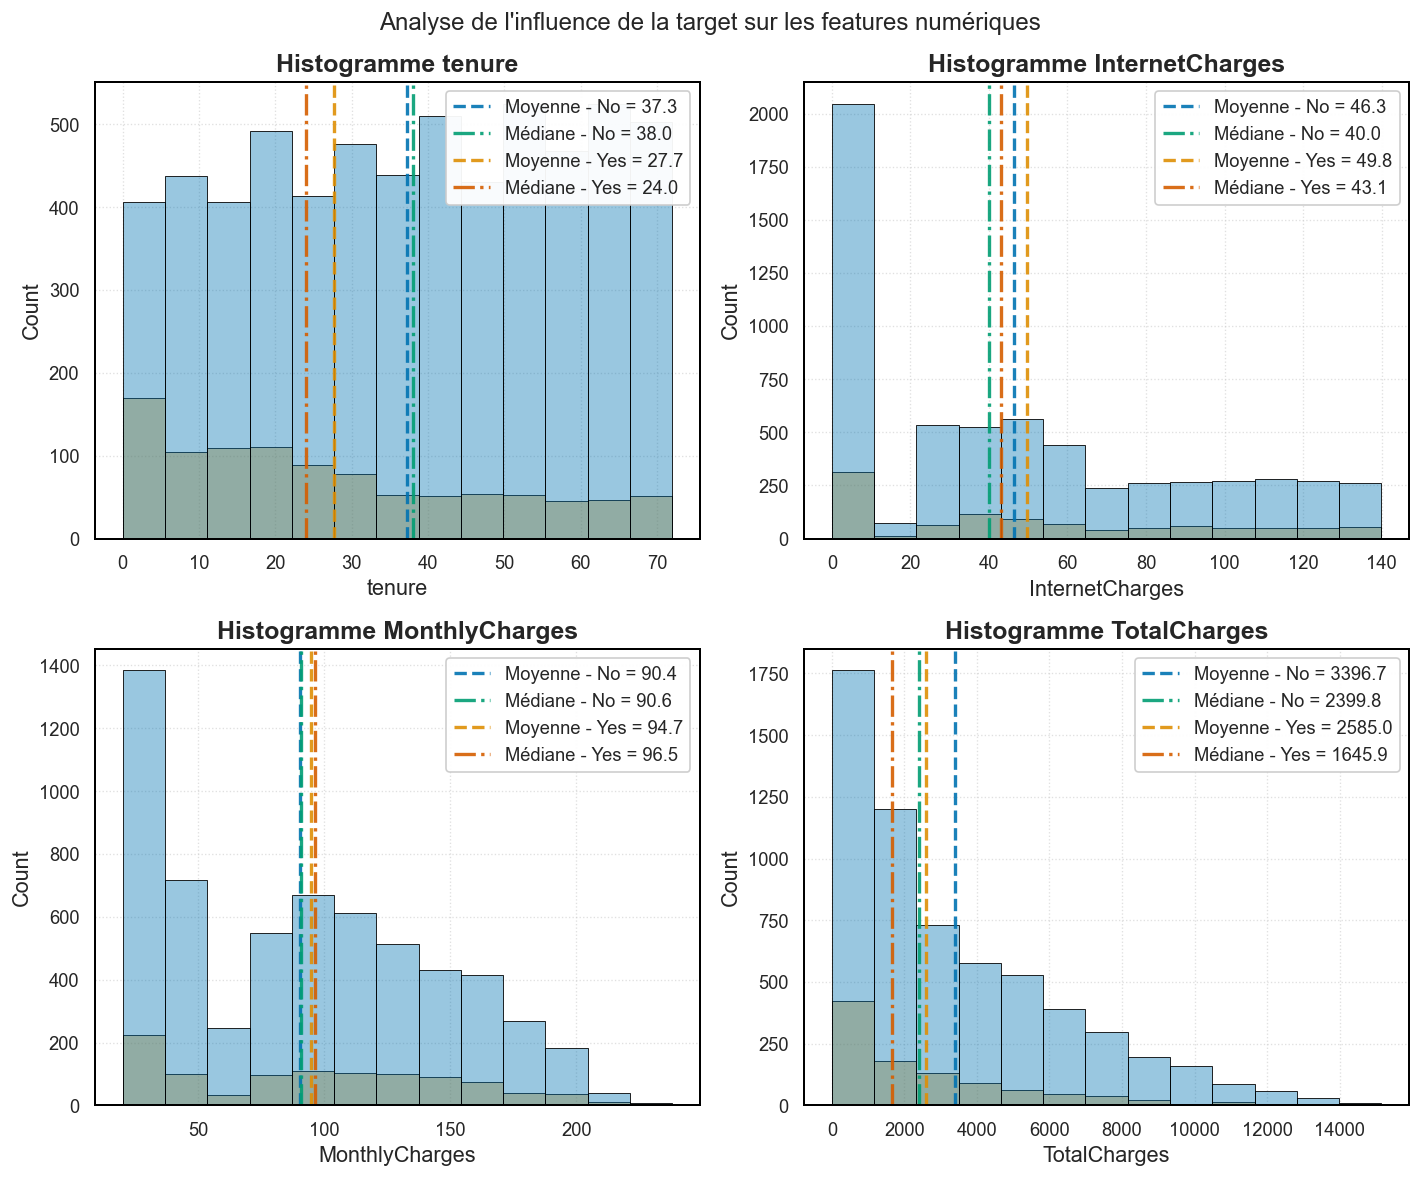

In [327]:
def create_histplot_target(ax, df, target, column):
    sns.histplot(
        data=df,
        x=column,
        hue=target,
        bins=int(1 + np.log2(len(df))),
        edgecolor="black",
        linewidth=0.5,
        alpha=0.4,
        ax=ax,
        kde=False,
        palette="colorblind",
    )

    modalities = df[target].unique()
    for i, modality in enumerate(modalities):
        subset = df[df[target] == modality][column]
        mean_val = subset.mean()
        median_val = subset.median()

        ax.axvline(
            mean_val,
            color=COLORBLIND_PALETTE[i],
            linestyle="--",
            linewidth=2,
            alpha=0.9,
            label=f"Moyenne - {modality} = {mean_val:.1f}",
        )
        ax.axvline(
            median_val,
            color=COLORBLIND_PALETTE[len(modalities) + i],
            linestyle="-.",
            linewidth=2,
            alpha=0.9,
            label=f"Médiane - {modality} = {median_val:.1f}",
        )

    ax.set_title(f"Histogramme {column}")
    ax.legend(frameon=True)


fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes = axes.flatten()

fig.suptitle("Analyse de l'influence de la target sur les features numériques")

for k in range(len(axes)):
    ax = axes[k]
    column = num_features[k]
    create_histplot_target(ax=ax, df=df, target=target, column=column)

fig.tight_layout()
plt.savefig((FIGURE_DIR / "01_target_analyse_numeric_features.png").as_posix())
plt.show()

Observations :
- Pour la variable `tenure`, la queue de distribution est plus lourde à droite pour la modalité `No` et plus lourde à gauche pour la modalité `Yes`. Les moyennes des modalités, tout comme les médianes sont éloignées.
- Pour les variables `ÌnternetCharges`, `MonthlyCharges` et `TotalCharges`, les distributions entre les modalités `Yes` et `No` sont semblables.

Interprétation (à confirmer avec l'équipe métier) :
- Les clients nouveaux ont plus tendence à partir que les clients anciens.

In [328]:
tenure_Yes = df.set_index(target)["tenure"]["Yes"]
tenure_No = df.set_index(target)["tenure"]["No"]
alpha = 0.05

for grp in [tenure_Yes, tenure_No]:
    print(f"Test de Shapiro-Wilk le groupe {grp.index[0]}")

    statistic, p_value = stats.shapiro(tenure_No.sample(3000))
    print(f"  Statistique W : {statistic}")
    print(f"  p-value       : {p_value}")

    # Interprétation
    if p_value > alpha:
        print(
            "  On ne rejette pas H0 : la distribution est compatible avec une loi normale."
        )
    else:
        print("  On rejette H0 : la distribution n'est pas normale.")
    print()


Test de Shapiro-Wilk le groupe Yes
  Statistique W : 0.9556603668756769
  p-value       : 2.7310220422940306e-29
  On rejette H0 : la distribution n'est pas normale.

Test de Shapiro-Wilk le groupe No
  Statistique W : 0.9560679166283217
  p-value       : 3.570684245096211e-29
  On rejette H0 : la distribution n'est pas normale.



In [329]:
alpha = 0.05


stat, p_value = stats.mannwhitneyu(tenure_Yes, tenure_No, alternative="two-sided")

print("Test de Man-Whitney")
print(f"  Statistique: {stat:.3f}")
print(f"  p-value: {p_value:.4f}")

# Interprétation
if p_value > alpha:
    print(
        "  On ne rejette pas H0 : les distributions ne sont pas significativement différentes."
    )
else:
    print("  On rejette H0 : différence significative entre les distributions.")
print()

Test de Man-Whitney
  Statistique: 2246117.500
  p-value: 0.0000
  On rejette H0 : différence significative entre les distributions.



Le test de Mann-Whitney conclut que la différence des distributions observées pour la variable `tenure` selon les modalités du `Churn` est significative.

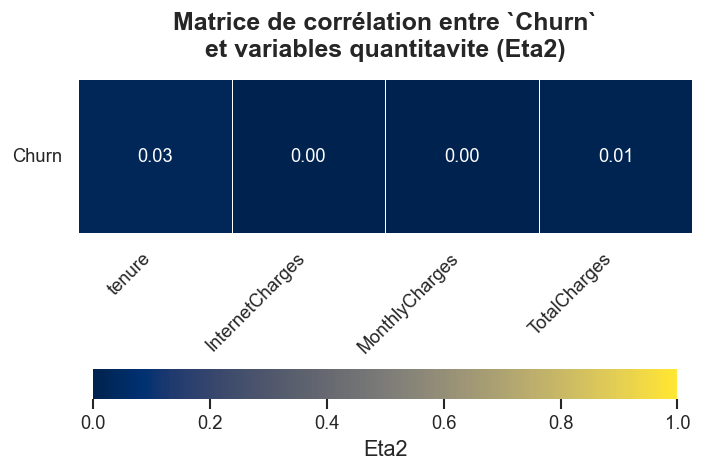

In [330]:
target_num_corr_df = compute_cat_num_corr_df(
    df=df, cat_vars=[target], num_vars=num_features
)

fig, ax = plt.subplots(figsize=(7, 4))

heatmap = sns.heatmap(
    target_num_corr_df,
    annot=True,
    fmt=".2f",
    cmap="cividis",
    vmin=0,
    vmax=1,
    square=True,
    linewidths=0.6,
    linecolor="white",
    cbar_kws={"shrink": 0.8, "pad": 0.4, "label": "Eta2", "orientation": "horizontal"},
    annot_kws={"size": 11},
    ax=ax,
)
ax.set_title(
    "Matrice de corrélation entre `Churn`\net variables quantitavite (Eta2)",
    pad=14,
)
ax.set_xticklabels(num_features, rotation=45, ha="right")
ax.set_yticklabels([target], rotation=0)

plt.tight_layout()
plt.savefig((FIGURE_DIR / "01_correlation_matrix_target_num.png"))
plt.show()

Observation :
- Aucune corrélation révélée par le calcule du $\eta^{2}$ empirique.